In [1175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [1176]:
df_holiday_events = pd.read_csv('../data/row/holidays_events.csv')
df_oil = pd.read_csv('../data/row/oil.csv')
df_stores = pd.read_csv('../data/row/stores.csv')
df_train = pd.read_csv('../data/row/train.csv')
df_transactions = pd.read_csv('../data/row/transactions.csv')
df_test = pd.read_csv('../data/row/test.csv')

In [1177]:
df_holiday_events

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [1178]:
df_oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [1179]:
len(df_oil.date.unique())

1218

In [1180]:
len(df_train.date.unique())

1684

In [1181]:
df_stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [1182]:
df_train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [1183]:
df_transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [1184]:
df_test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [1185]:
df_train['store_nbr'].min(), df_train.store_nbr.max()

(np.int64(1), np.int64(54))

In [1186]:
df_train.id.max()

np.int64(3000887)

In [1187]:
df_train.family.unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [1188]:
df_train.sales.max(), df_train.sales.min()

(np.float64(124717.0), np.float64(0.0))

In [1189]:
df_train.onpromotion.min(), df_train.onpromotion.max()

(np.int64(0), np.int64(741))

In [1190]:
df_concat = pd.concat([df_train, df_test], axis=0, ignore_index=True)

df_concat

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
...,...,...,...,...,...,...
3029395,3029395,2017-08-31,9,POULTRY,NaN,1
3029396,3029396,2017-08-31,9,PREPARED FOODS,NaN,0
3029397,3029397,2017-08-31,9,PRODUCE,NaN,1
3029398,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9


In [1191]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3029400 entries, 0 to 3029399
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 138.7+ MB


In [1192]:
df_concat[df_concat.sales.isnull()]

,id,date,store_nbr,family,sales,onpromotion
3000888,3000888,2017-08-16,1,AUTOMOTIVE,NaN,0
3000889,3000889,2017-08-16,1,BABY CARE,NaN,0
3000890,3000890,2017-08-16,1,BEAUTY,NaN,2
3000891,3000891,2017-08-16,1,BEVERAGES,NaN,20
3000892,3000892,2017-08-16,1,BOOKS,NaN,0
...,...,...,...,...,...,...
3029395,3029395,2017-08-31,9,POULTRY,NaN,1
3029396,3029396,2017-08-31,9,PREPARED FOODS,NaN,0
3029397,3029397,2017-08-31,9,PRODUCE,NaN,1
3029398,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9


In [1193]:
df_concat.store_nbr = df_concat.store_nbr.astype('category')
df_concat.id = df_concat.id.astype('uint32')
df_concat.date = pd.to_datetime(df_concat.date)
df_concat.family = df_concat.family.astype('category')
df_concat.onpromotion = df_concat.onpromotion.astype('uint16')

In [1194]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3029400 entries, 0 to 3029399
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           uint32        
 1   date         datetime64[ns]
 2   store_nbr    category      
 3   family       category      
 4   sales        float64       
 5   onpromotion  uint16        
dtypes: category(2), datetime64[ns](1), float64(1), uint16(1), uint32(1)
memory usage: 69.3 MB


In [1195]:
df_transactions.transactions.min(), df_transactions.transactions.max()

(np.int64(5), np.int64(8359))

In [1196]:
df_transactions.date = pd.to_datetime(df_transactions.date)
df_transactions.store_nbr = df_transactions.store_nbr.astype('category')
df_transactions.transactions = df_transactions.transactions.astype('uint16')

In [1197]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  category      
 2   transactions  83488 non-null  uint16        
dtypes: category(1), datetime64[ns](1), uint16(1)
memory usage: 899.4 KB


In [1198]:
df_stores.cluster.min(), df_stores.cluster.max()

(np.int64(1), np.int64(17))

In [1199]:
df_stores.store_nbr = df_stores.store_nbr.astype('category')
df_stores.city = df_stores.city.astype('category')
df_stores.state = df_stores.state.astype('category')
df_stores.type = df_stores.type.astype('category')
df_stores.cluster = df_stores.cluster.astype('category')

In [1200]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   store_nbr  54 non-null     category
 1   city       54 non-null     category
 2   state      54 non-null     category
 3   type       54 non-null     category
 4   cluster    54 non-null     category
dtypes: category(5)
memory usage: 5.1 KB


In [1201]:
df_oil['dcoilwtico'].min(), df_oil.dcoilwtico.max()

(np.float64(26.19), np.float64(110.62))

In [1202]:
df_oil.date = pd.to_datetime(df_oil.date)
df_oil.dcoilwtico = df_oil.dcoilwtico.astype('float32')

In [1203]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float32       
dtypes: datetime64[ns](1), float32(1)
memory usage: 14.4 KB


In [1204]:
df_holiday_events.date = pd.to_datetime(df_holiday_events.date)
df_holiday_events.type = df_holiday_events.type.astype('category')
df_holiday_events.locale = df_holiday_events.locale.astype('category')
df_holiday_events.locale_name = df_holiday_events.locale_name.astype('category')

In [1205]:
df_holiday_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    category      
 2   locale       350 non-null    category      
 3   locale_name  350 non-null    category      
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), category(3), datetime64[ns](1), object(1)
memory usage: 8.0+ KB


In [1206]:
df_holiday_events = df_holiday_events[df_holiday_events['transferred'] != True]

df_holiday_events = df_holiday_events.drop(columns=['transferred'])

df_holiday_events

,date,type,locale,locale_name,description
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba
...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3
346,2017-12-23,Additional,National,Ecuador,Navidad-2
347,2017-12-24,Additional,National,Ecuador,Navidad-1
348,2017-12-25,Holiday,National,Ecuador,Navidad


In [1207]:
df = pd.merge(df_concat, df_transactions, how='left', on=['date', 'store_nbr'])

df

,id,date,store_nbr,family,sales,onpromotion,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,NaN
...,...,...,...,...,...,...,...
3029395,3029395,2017-08-31,9,POULTRY,NaN,1,NaN
3029396,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,NaN
3029397,3029397,2017-08-31,9,PRODUCE,NaN,1,NaN
3029398,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,NaN


In [1208]:
df = pd.merge(df, df_stores, how='left', on='store_nbr')

df

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...
3029395,3029395,2017-08-31,9,POULTRY,NaN,1,NaN,Quito,Pichincha,B,6
3029396,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,NaN,Quito,Pichincha,B,6
3029397,3029397,2017-08-31,9,PRODUCE,NaN,1,NaN,Quito,Pichincha,B,6
3029398,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,NaN,Quito,Pichincha,B,6


In [1209]:
df = pd.merge(df, df_oil, how='left', on='date')

df

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type,cluster,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3029395,3029395,2017-08-31,9,POULTRY,NaN,1,NaN,Quito,Pichincha,B,6,47.259998
3029396,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,NaN,Quito,Pichincha,B,6,47.259998
3029397,3029397,2017-08-31,9,PRODUCE,NaN,1,NaN,Quito,Pichincha,B,6,47.259998
3029398,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,NaN,Quito,Pichincha,B,6,47.259998


In [1210]:
df = pd.merge(df, df_holiday_events, how='left', on='date', suffixes=('_stores', '_holiday_events'))

df

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type_stores,cluster,dcoilwtico,type_holiday_events,locale,locale_name,description
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082855,3029395,2017-08-31,9,POULTRY,NaN,1,NaN,Quito,Pichincha,B,6,47.259998,NaN,NaN,NaN,NaN
3082856,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,NaN,Quito,Pichincha,B,6,47.259998,NaN,NaN,NaN,NaN
3082857,3029397,2017-08-31,9,PRODUCE,NaN,1,NaN,Quito,Pichincha,B,6,47.259998,NaN,NaN,NaN,NaN
3082858,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,NaN,Quito,Pichincha,B,6,47.259998,NaN,NaN,NaN,NaN


In [1211]:
df.type_holiday_events.value_counts()

type_holiday_events
Holiday       290466
Event          99792
Additional     67716
Transfer       16038
Work Day        8910
Bridge          5346
Name: count, dtype: int64

In [1212]:
df.locale.value_counts()

locale
National    249480
Local       206712
Regional     32076
Name: count, dtype: int64

In [1213]:
df.locale_name.value_counts()

locale_name
Ecuador                           249480
Riobamba                           17820
Guayaquil                          17820
Ambato                             16038
Guaranda                           16038
Latacunga                          16038
Quito                              14256
Cayambe                             8910
Santo Domingo                       8910
Puyo                                8910
Manta                               8910
Machala                             8910
Libertad                            8910
Imbabura                            8910
Esmeraldas                          8910
El Carmen                           8910
Cuenca                              8910
Cotopaxi                            8910
Loja                                7128
Ibarra                              7128
Quevedo                             7128
Salinas                             7128
Santa Elena                         7128
Santo Domingo de los Tsachilas      7128
Name

In [1214]:
print(f"{round((df.isnull().sum() / len(df) * 100))}%")

id                      0.0
date                    0.0
store_nbr               0.0
family                  0.0
sales                   1.0
onpromotion             0.0
transactions            9.0
city                    0.0
state                   0.0
type_stores             0.0
cluster                 0.0
dcoilwtico             31.0
type_holiday_events    84.0
locale                 84.0
locale_name            84.0
description            84.0
dtype: float64%


In [1215]:
df[df['type_holiday_events'].isnull()].sample(10)

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type_stores,cluster,dcoilwtico,type_holiday_events,locale,locale_name,description
1586126,1566524,2015-06-01,13,HARDWARE,2.000,0,1105.0,Latacunga,Cotopaxi,C,15,60.240002,NaN,NaN,NaN,NaN
2047900,2021170,2016-02-12,2,LADIESWEAR,31.000,0,2020.0,Quito,Pichincha,D,13,29.320000,NaN,NaN,NaN,NaN
3027205,2973745,2017-07-31,47,HOME AND KITCHEN II,60.000,1,3775.0,Quito,Pichincha,A,14,50.209999,NaN,NaN,NaN,NaN
788098,779188,2014-03-15,21,PERSONAL CARE,0.000,0,NaN,Santo Domingo,Santo Domingo de los Tsachilas,B,6,NaN,NaN,NaN,NaN,NaN
1617626,1598024,2015-06-18,46,SEAFOOD,51.838,2,2989.0,Quito,Pichincha,A,14,60.410000,NaN,NaN,NaN,NaN
2100946,2074216,2016-03-12,9,BABY CARE,0.000,0,2206.0,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,NaN
264164,262382,2013-05-28,20,SEAFOOD,0.000,0,NaN,Quito,Pichincha,B,6,94.650002,NaN,NaN,NaN,NaN
2322478,2281492,2016-07-07,24,BOOKS,0.000,0,2089.0,Guayaquil,Guayas,D,1,45.220001,NaN,NaN,NaN,NaN
2653947,2607615,2017-01-07,24,LINGERIE,22.000,0,2163.0,Guayaquil,Guayas,D,1,NaN,NaN,NaN,NaN,NaN
46730,46730,2013-01-27,20,BEAUTY,0.000,0,NaN,Quito,Pichincha,B,6,NaN,NaN,NaN,NaN,NaN


here apparently with Work Day, locale and description does not have any meaning

In [1216]:
df_holiday_events[df_holiday_events.type == 'Work Day']

,date,type,locale,locale_name,description
42,2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad
43,2013-01-12,Work Day,National,Ecuador,Recupero puente primer dia del ano
149,2014-12-20,Work Day,National,Ecuador,Recupero Puente Navidad
161,2015-01-10,Work Day,National,Ecuador,Recupero Puente Primer dia del ano
283,2016-11-12,Work Day,National,Ecuador,Recupero Puente Dia de Difuntos


description is not needed

In [1217]:
df = df.drop(columns=['description'])

df

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type_stores,cluster,dcoilwtico,type_holiday_events,locale,locale_name
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082855,3029395,2017-08-31,9,POULTRY,NaN,1,NaN,Quito,Pichincha,B,6,47.259998,NaN,NaN,NaN
3082856,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,NaN,Quito,Pichincha,B,6,47.259998,NaN,NaN,NaN
3082857,3029397,2017-08-31,9,PRODUCE,NaN,1,NaN,Quito,Pichincha,B,6,47.259998,NaN,NaN,NaN
3082858,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,NaN,Quito,Pichincha,B,6,47.259998,NaN,NaN,NaN


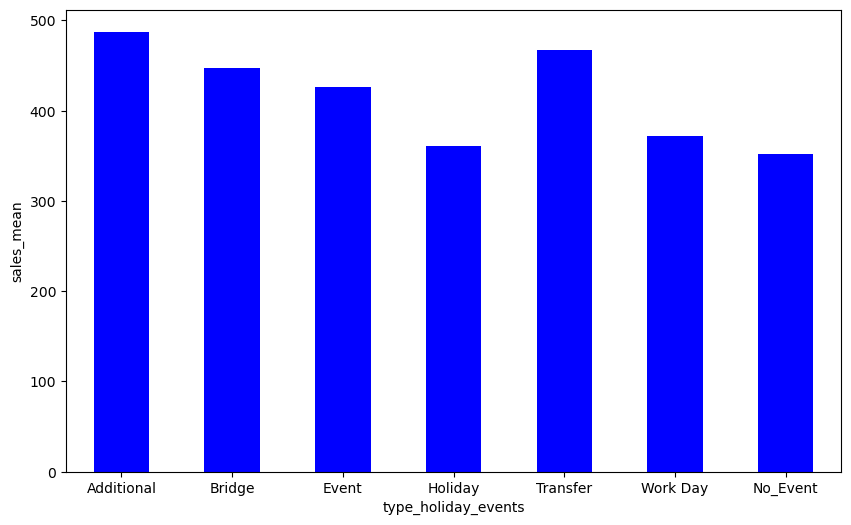

In [1218]:
df_temp = df.copy()

df_temp['type_holiday_events'] = df_temp['type_holiday_events'].cat.add_categories('No_Event')

df_temp['type_holiday_events'] = df_temp['type_holiday_events'].fillna('No_Event')

average_sales = df_temp.groupby('type_holiday_events', observed=False)['sales'].mean()

plt.figure(figsize=(10, 6))
average_sales.plot(kind='bar', color='blue')

plt.xlabel('type_holiday_events')
plt.ylabel('sales_mean')
plt.xticks(rotation=0)
plt.show()


In [1219]:
df[df.type_holiday_events.isnull()]

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type_stores,cluster,dcoilwtico,type_holiday_events,locale,locale_name
1782,1782,2013-01-02,1,AUTOMOTIVE,2.0,0,2111.0,Quito,Pichincha,D,13,93.139999,NaN,NaN,NaN
1783,1783,2013-01-02,1,BABY CARE,0.0,0,2111.0,Quito,Pichincha,D,13,93.139999,NaN,NaN,NaN
1784,1784,2013-01-02,1,BEAUTY,2.0,0,2111.0,Quito,Pichincha,D,13,93.139999,NaN,NaN,NaN
1785,1785,2013-01-02,1,BEVERAGES,1091.0,0,2111.0,Quito,Pichincha,D,13,93.139999,NaN,NaN,NaN
1786,1786,2013-01-02,1,BOOKS,0.0,0,2111.0,Quito,Pichincha,D,13,93.139999,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082855,3029395,2017-08-31,9,POULTRY,NaN,1,NaN,Quito,Pichincha,B,6,47.259998,NaN,NaN,NaN
3082856,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,NaN,Quito,Pichincha,B,6,47.259998,NaN,NaN,NaN
3082857,3029397,2017-08-31,9,PRODUCE,NaN,1,NaN,Quito,Pichincha,B,6,47.259998,NaN,NaN,NaN
3082858,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,NaN,Quito,Pichincha,B,6,47.259998,NaN,NaN,NaN


In [1220]:
no_event_columns = ['type_holiday_events', 'locale', 'locale_name']

for col in no_event_columns:
    df[col] = df[col].cat.add_categories('No_Event')

df[no_event_columns] = df[no_event_columns].fillna('No_Event')

df

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type_stores,cluster,dcoilwtico,type_holiday_events,locale,locale_name
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082855,3029395,2017-08-31,9,POULTRY,NaN,1,NaN,Quito,Pichincha,B,6,47.259998,No_Event,No_Event,No_Event
3082856,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,NaN,Quito,Pichincha,B,6,47.259998,No_Event,No_Event,No_Event
3082857,3029397,2017-08-31,9,PRODUCE,NaN,1,NaN,Quito,Pichincha,B,6,47.259998,No_Event,No_Event,No_Event
3082858,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,NaN,Quito,Pichincha,B,6,47.259998,No_Event,No_Event,No_Event


In [1221]:
df.isnull().sum()

id                          0
date                        0
store_nbr                   0
family                      0
sales                   28512
onpromotion                 0
transactions           277629
city                        0
state                       0
type_stores                 0
cluster                     0
dcoilwtico             962280
type_holiday_events         0
locale                      0
locale_name                 0
dtype: int64

In [1222]:
df.dcoilwtico = df.dcoilwtico.fillna(df.dcoilwtico.mean())
df.transactions = df.transactions.fillna(df.transactions.mean())

df.isnull().sum()

id                         0
date                       0
store_nbr                  0
family                     0
sales                  28512
onpromotion                0
transactions               0
city                       0
state                      0
type_stores                0
cluster                    0
dcoilwtico                 0
type_holiday_events        0
locale                     0
locale_name                0
dtype: int64

In [1223]:
df.onpromotion.value_counts()

onpromotion
0      2444471
1       181305
2        82243
3        47576
4        32845
        ...   
313          1
452          1
642          1
305          1
592          1
Name: count, Length: 367, dtype: int64

In [1224]:
df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'transactions', 'city', 'state', 'type_stores', 'cluster', 'dcoilwtico',
       'type_holiday_events', 'locale', 'locale_name'],
      dtype='object')

In [1225]:
df.date.min(), df.date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-31 00:00:00'))

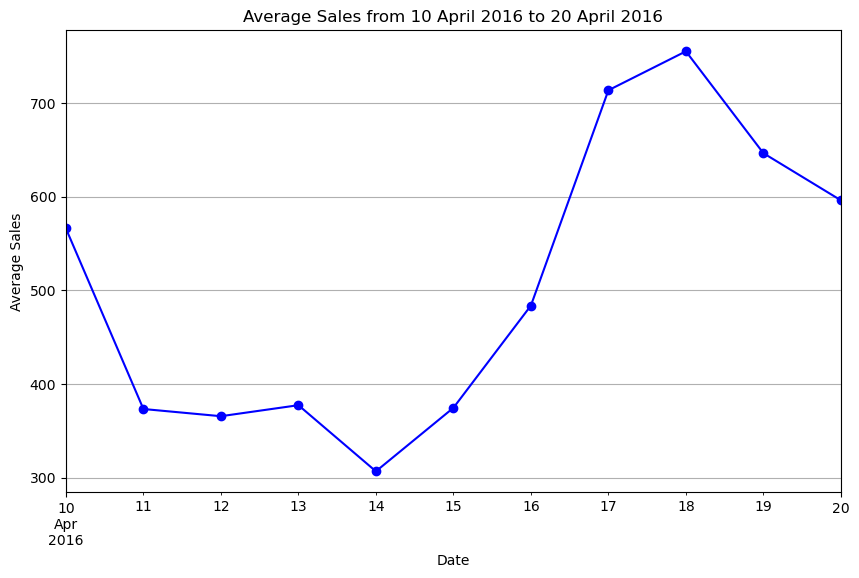

In [1226]:
df_filtered = df[(df.date >= '2016-04-10') & (df.date <= '2016-04-20')]

average_sales = df_filtered.groupby('date')['sales'].mean()

plt.figure(figsize=(10, 6))
average_sales.plot(kind='line', marker='o', color='blue')

plt.title('Average Sales from 10 April 2016 to 20 April 2016')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()

because of the earthquack the values are seem to be much higher than normal specifically from 16th to 18th, so I am replacing these values with the mean

In [1227]:
df.loc[(df['date'] >= '2016-04-16') & (df['date'] <= '2016-04-18'), 'sales'] = df['sales'].mean()

df

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type_stores,cluster,dcoilwtico,type_holiday_events,locale,locale_name
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1697.071441,Quito,Pichincha,D,13,67.806396,Holiday,National,Ecuador
1,1,2013-01-01,1,BABY CARE,0.0,0,1697.071441,Quito,Pichincha,D,13,67.806396,Holiday,National,Ecuador
2,2,2013-01-01,1,BEAUTY,0.0,0,1697.071441,Quito,Pichincha,D,13,67.806396,Holiday,National,Ecuador
3,3,2013-01-01,1,BEVERAGES,0.0,0,1697.071441,Quito,Pichincha,D,13,67.806396,Holiday,National,Ecuador
4,4,2013-01-01,1,BOOKS,0.0,0,1697.071441,Quito,Pichincha,D,13,67.806396,Holiday,National,Ecuador
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082855,3029395,2017-08-31,9,POULTRY,NaN,1,1697.071441,Quito,Pichincha,B,6,47.259998,No_Event,No_Event,No_Event
3082856,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,1697.071441,Quito,Pichincha,B,6,47.259998,No_Event,No_Event,No_Event
3082857,3029397,2017-08-31,9,PRODUCE,NaN,1,1697.071441,Quito,Pichincha,B,6,47.259998,No_Event,No_Event,No_Event
3082858,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,1697.071441,Quito,Pichincha,B,6,47.259998,No_Event,No_Event,No_Event


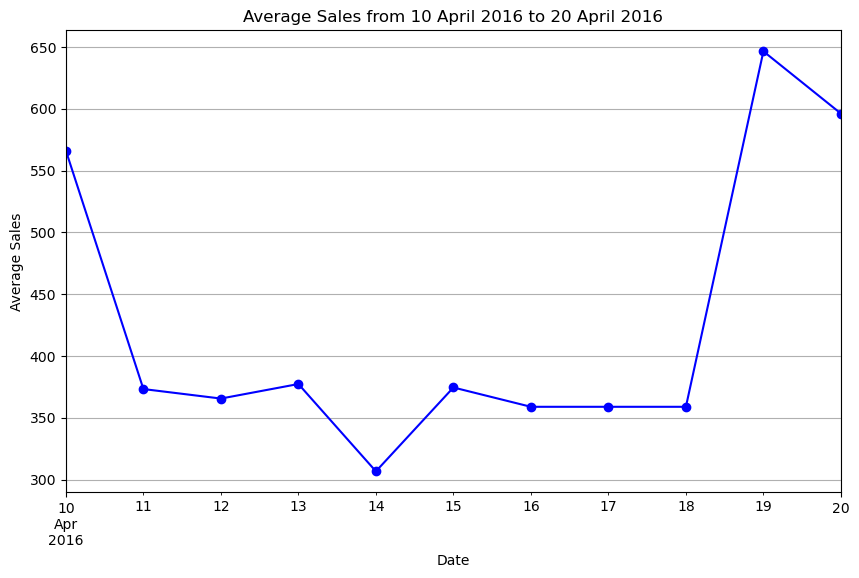

In [1228]:
df_filtered = df[(df.date >= '2016-04-10') & (df.date <= '2016-04-20')]

average_sales = df_filtered.groupby('date')['sales'].mean()

plt.figure(figsize=(10, 6))
average_sales.plot(kind='line', marker='o', color='blue')

plt.title('Average Sales from 10 April 2016 to 20 April 2016')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()

In [1229]:
df['pay_day'] = np.where(
    (df['date'].dt.day == 15) | 
    (df['date'].dt.is_month_end), 
    True, 
    False
)

df

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type_stores,cluster,dcoilwtico,type_holiday_events,locale,locale_name,pay_day
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1697.071441,Quito,Pichincha,D,13,67.806396,Holiday,National,Ecuador,False
1,1,2013-01-01,1,BABY CARE,0.0,0,1697.071441,Quito,Pichincha,D,13,67.806396,Holiday,National,Ecuador,False
2,2,2013-01-01,1,BEAUTY,0.0,0,1697.071441,Quito,Pichincha,D,13,67.806396,Holiday,National,Ecuador,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,1697.071441,Quito,Pichincha,D,13,67.806396,Holiday,National,Ecuador,False
4,4,2013-01-01,1,BOOKS,0.0,0,1697.071441,Quito,Pichincha,D,13,67.806396,Holiday,National,Ecuador,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082855,3029395,2017-08-31,9,POULTRY,NaN,1,1697.071441,Quito,Pichincha,B,6,47.259998,No_Event,No_Event,No_Event,True
3082856,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,1697.071441,Quito,Pichincha,B,6,47.259998,No_Event,No_Event,No_Event,True
3082857,3029397,2017-08-31,9,PRODUCE,NaN,1,1697.071441,Quito,Pichincha,B,6,47.259998,No_Event,No_Event,No_Event,True
3082858,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,1697.071441,Quito,Pichincha,B,6,47.259998,No_Event,No_Event,No_Event,True


In [1230]:
df[df.pay_day == True].sample(10)

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type_stores,cluster,dcoilwtico,type_holiday_events,locale,locale_name,pay_day
2078369,2051639,2016-02-29,24,PREPARED FOODS,120.157,0,2218.000000,Guayaquil,Guayas,D,1,32.740002,No_Event,No_Event,No_Event,True
1754317,1729369,2015-08-31,32,BOOKS,0.000,0,605.000000,Guayaquil,Guayas,C,3,49.200001,No_Event,No_Event,No_Event,True
295842,294060,2013-06-15,1,PRODUCE,5.000,0,1356.000000,Quito,Pichincha,D,13,67.806396,No_Event,No_Event,No_Event,True
2053685,2026955,2016-02-15,31,PREPARED FOODS,98.963,0,1356.000000,Babahoyo,Los Rios,B,10,67.806396,No_Event,No_Event,No_Event,True
3053507,3000047,2017-08-15,35,HOME APPLIANCES,1.000,0,612.000000,Playas,Guayas,C,3,47.570000,Holiday,Local,Riobamba,True
2053832,2027102,2016-02-15,36,FROZEN FOODS,85.758,0,1156.000000,Libertad,Guayas,E,10,67.806396,No_Event,No_Event,No_Event,True
1447401,1427799,2015-03-15,20,LINGERIE,3.000,0,2403.000000,Quito,Pichincha,B,6,67.806396,No_Event,No_Event,No_Event,True
1122756,1106718,2014-09-15,11,PRODUCE,1082.819,0,2305.000000,Cayambe,Pichincha,B,6,92.860001,No_Event,No_Event,No_Event,True
439052,431924,2013-08-31,28,LAWN AND GARDEN,3.000,0,1394.000000,Guayaquil,Guayas,E,10,67.806396,No_Event,No_Event,No_Event,True
159080,159080,2013-03-31,22,LAWN AND GARDEN,0.000,0,1697.071441,Puyo,Pastaza,C,7,67.806396,No_Event,No_Event,No_Event,True


In [1231]:
df['month'] = df['date'].dt.month

df

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type_stores,cluster,dcoilwtico,type_holiday_events,locale,locale_name,pay_day,month
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1697.071441,Quito,Pichincha,D,13,67.806396,Holiday,National,Ecuador,False,1
1,1,2013-01-01,1,BABY CARE,0.0,0,1697.071441,Quito,Pichincha,D,13,67.806396,Holiday,National,Ecuador,False,1
2,2,2013-01-01,1,BEAUTY,0.0,0,1697.071441,Quito,Pichincha,D,13,67.806396,Holiday,National,Ecuador,False,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,1697.071441,Quito,Pichincha,D,13,67.806396,Holiday,National,Ecuador,False,1
4,4,2013-01-01,1,BOOKS,0.0,0,1697.071441,Quito,Pichincha,D,13,67.806396,Holiday,National,Ecuador,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082855,3029395,2017-08-31,9,POULTRY,NaN,1,1697.071441,Quito,Pichincha,B,6,47.259998,No_Event,No_Event,No_Event,True,8
3082856,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,1697.071441,Quito,Pichincha,B,6,47.259998,No_Event,No_Event,No_Event,True,8
3082857,3029397,2017-08-31,9,PRODUCE,NaN,1,1697.071441,Quito,Pichincha,B,6,47.259998,No_Event,No_Event,No_Event,True,8
3082858,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,1697.071441,Quito,Pichincha,B,6,47.259998,No_Event,No_Event,No_Event,True,8


In [1232]:
df.sample(10)

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type_stores,cluster,dcoilwtico,type_holiday_events,locale,locale_name,pay_day,month
2849619,2801505,2017-04-26,15,BEVERAGES,1763.000,37,1388.000000,Ibarra,Imbabura,C,15,49.220001,No_Event,No_Event,No_Event,False,4
148335,148335,2013-03-25,21,AUTOMOTIVE,0.000,0,1697.071441,Santo Domingo,Santo Domingo de los Tsachilas,B,6,94.550003,No_Event,No_Event,No_Event,False,3
1885420,1860472,2015-11-13,10,SCHOOL AND OFFICE SUPPLIES,0.000,0,780.000000,Quito,Pichincha,C,15,40.689999,No_Event,No_Event,No_Event,False,11
504720,497592,2013-10-07,20,HOME CARE,0.000,0,1697.071441,Quito,Pichincha,B,6,103.070000,Holiday,Local,Quevedo,False,10
2098948,2072218,2016-03-11,51,HOME AND KITCHEN II,8.000,1,1828.000000,Guayaquil,Guayas,A,17,38.509998,No_Event,No_Event,No_Event,False,3
567534,560406,2013-11-11,33,AUTOMOTIVE,4.000,0,1127.000000,Quevedo,Los Rios,C,3,95.129997,Holiday,Local,Latacunga,False,11
2408415,2365647,2016-08-23,35,DELI,118.000,6,683.000000,Playas,Guayas,C,3,47.540001,No_Event,No_Event,No_Event,False,8
1958545,1931815,2015-12-23,12,POULTRY,169.230,0,1855.000000,Latacunga,Cotopaxi,C,15,36.759998,Additional,National,Ecuador,False,12
2062458,2035728,2016-02-20,28,MEATS,184.759,0,1213.000000,Guayaquil,Guayas,E,10,67.806396,No_Event,No_Event,No_Event,False,2
3018037,2964577,2017-07-26,4,"LIQUOR,WINE,BEER",42.000,3,1323.000000,Quito,Pichincha,D,9,48.580002,No_Event,No_Event,No_Event,False,7


In [1233]:
df.transactions = df.transactions.astype('uint32')
df.transform
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3082860 entries, 0 to 3082859
Data columns (total 17 columns):
 #   Column               Dtype         
---  ------               -----         
 0   id                   uint32        
 1   date                 datetime64[ns]
 2   store_nbr            category      
 3   family               category      
 4   sales                float64       
 5   onpromotion          uint16        
 6   transactions         uint32        
 7   city                 category      
 8   state                category      
 9   type_stores          category      
 10  cluster              category      
 11  dcoilwtico           float32       
 12  type_holiday_events  category      
 13  locale               category      
 14  locale_name          category      
 15  pay_day              bool          
 16  month                int32         
dtypes: bool(1), category(9), datetime64[ns](1), float32(1), float64(1), int32(1), uint16(1), uint32(2)
memo

In [1234]:
df

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type_stores,cluster,dcoilwtico,type_holiday_events,locale,locale_name,pay_day,month
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1697,Quito,Pichincha,D,13,67.806396,Holiday,National,Ecuador,False,1
1,1,2013-01-01,1,BABY CARE,0.0,0,1697,Quito,Pichincha,D,13,67.806396,Holiday,National,Ecuador,False,1
2,2,2013-01-01,1,BEAUTY,0.0,0,1697,Quito,Pichincha,D,13,67.806396,Holiday,National,Ecuador,False,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,1697,Quito,Pichincha,D,13,67.806396,Holiday,National,Ecuador,False,1
4,4,2013-01-01,1,BOOKS,0.0,0,1697,Quito,Pichincha,D,13,67.806396,Holiday,National,Ecuador,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082855,3029395,2017-08-31,9,POULTRY,NaN,1,1697,Quito,Pichincha,B,6,47.259998,No_Event,No_Event,No_Event,True,8
3082856,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,1697,Quito,Pichincha,B,6,47.259998,No_Event,No_Event,No_Event,True,8
3082857,3029397,2017-08-31,9,PRODUCE,NaN,1,1697,Quito,Pichincha,B,6,47.259998,No_Event,No_Event,No_Event,True,8
3082858,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,1697,Quito,Pichincha,B,6,47.259998,No_Event,No_Event,No_Event,True,8


In [1235]:
df.isnull().sum()

id                         0
date                       0
store_nbr                  0
family                     0
sales                  28512
onpromotion                0
transactions               0
city                       0
state                      0
type_stores                0
cluster                    0
dcoilwtico                 0
type_holiday_events        0
locale                     0
locale_name                0
pay_day                    0
month                      0
dtype: int64

In [1236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3082860 entries, 0 to 3082859
Data columns (total 17 columns):
 #   Column               Dtype         
---  ------               -----         
 0   id                   uint32        
 1   date                 datetime64[ns]
 2   store_nbr            category      
 3   family               category      
 4   sales                float64       
 5   onpromotion          uint16        
 6   transactions         uint32        
 7   city                 category      
 8   state                category      
 9   type_stores          category      
 10  cluster              category      
 11  dcoilwtico           float32       
 12  type_holiday_events  category      
 13  locale               category      
 14  locale_name          category      
 15  pay_day              bool          
 16  month                int32         
dtypes: bool(1), category(9), datetime64[ns](1), float32(1), float64(1), int32(1), uint16(1), uint32(2)
memo

In [1237]:
category_columns = ['store_nbr', 'family', 'city', 'state', 'type_stores', 
                    'cluster', 'type_holiday_events', 'locale', 'locale_name',
                    'month']

continuous_columns = ['onpromotion', 'transactions', 'dcoilwtico']

In [1238]:
scaler = MinMaxScaler()

df[continuous_columns] = scaler.fit_transform(df[continuous_columns])

df

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type_stores,cluster,dcoilwtico,type_holiday_events,locale,locale_name,pay_day,month
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.000000,0.202538,Quito,Pichincha,D,13,0.492910,Holiday,National,Ecuador,False,1
1,1,2013-01-01,1,BABY CARE,0.0,0.000000,0.202538,Quito,Pichincha,D,13,0.492910,Holiday,National,Ecuador,False,1
2,2,2013-01-01,1,BEAUTY,0.0,0.000000,0.202538,Quito,Pichincha,D,13,0.492910,Holiday,National,Ecuador,False,1
3,3,2013-01-01,1,BEVERAGES,0.0,0.000000,0.202538,Quito,Pichincha,D,13,0.492910,Holiday,National,Ecuador,False,1
4,4,2013-01-01,1,BOOKS,0.0,0.000000,0.202538,Quito,Pichincha,D,13,0.492910,Holiday,National,Ecuador,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082855,3029395,2017-08-31,9,POULTRY,NaN,0.001350,0.202538,Quito,Pichincha,B,6,0.249556,No_Event,No_Event,No_Event,True,8
3082856,3029396,2017-08-31,9,PREPARED FOODS,NaN,0.000000,0.202538,Quito,Pichincha,B,6,0.249556,No_Event,No_Event,No_Event,True,8
3082857,3029397,2017-08-31,9,PRODUCE,NaN,0.001350,0.202538,Quito,Pichincha,B,6,0.249556,No_Event,No_Event,No_Event,True,8
3082858,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,0.012146,0.202538,Quito,Pichincha,B,6,0.249556,No_Event,No_Event,No_Event,True,8


In [1239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3082860 entries, 0 to 3082859
Data columns (total 17 columns):
 #   Column               Dtype         
---  ------               -----         
 0   id                   uint32        
 1   date                 datetime64[ns]
 2   store_nbr            category      
 3   family               category      
 4   sales                float64       
 5   onpromotion          float64       
 6   transactions         float64       
 7   city                 category      
 8   state                category      
 9   type_stores          category      
 10  cluster              category      
 11  dcoilwtico           float64       
 12  type_holiday_events  category      
 13  locale               category      
 14  locale_name          category      
 15  pay_day              bool          
 16  month                int32         
dtypes: bool(1), category(9), datetime64[ns](1), float64(4), int32(1), uint32(1)
memory usage: 170.5 MB


In [1240]:
def one_hot_encode_with_drop(df, columns):

    df_final = df.copy()
    
    for col in columns:

        dummies = pd.get_dummies(df[col], prefix=col)
        
        dummies = dummies.iloc[:, :-1]

        df_final = df_final.drop(col, axis=1)

        df_final = pd.concat([df_final, dummies], axis=1)
    
    return df_final

In [1241]:
df[df['id'].isin(df['id'][df['id'].duplicated(keep=False)])]

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type_stores,cluster,dcoilwtico,type_holiday_events,locale,locale_name,pay_day,month
233442,233442,2013-05-12,1,AUTOMOTIVE,1.000,0.000000,0.065119,Quito,Pichincha,D,13,0.49291,Holiday,Local,Puyo,False,5
233443,233442,2013-05-12,1,AUTOMOTIVE,1.000,0.000000,0.065119,Quito,Pichincha,D,13,0.49291,Event,National,Ecuador,False,5
233444,233443,2013-05-12,1,BABY CARE,0.000,0.000000,0.065119,Quito,Pichincha,D,13,0.49291,Holiday,Local,Puyo,False,5
233445,233443,2013-05-12,1,BABY CARE,0.000,0.000000,0.065119,Quito,Pichincha,D,13,0.49291,Event,National,Ecuador,False,5
233446,233444,2013-05-12,1,BEAUTY,0.000,0.000000,0.065119,Quito,Pichincha,D,13,0.49291,Holiday,Local,Puyo,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2977717,2924259,2017-07-03,9,PRODUCE,1797.212,0.012146,0.265621,Quito,Pichincha,B,6,0.49291,Holiday,Local,Santo Domingo,False,7
2977718,2924260,2017-07-03,9,SCHOOL AND OFFICE SUPPLIES,2.000,0.000000,0.265621,Quito,Pichincha,B,6,0.49291,Holiday,Local,El Carmen,False,7
2977719,2924260,2017-07-03,9,SCHOOL AND OFFICE SUPPLIES,2.000,0.000000,0.265621,Quito,Pichincha,B,6,0.49291,Holiday,Local,Santo Domingo,False,7
2977720,2924261,2017-07-03,9,SEAFOOD,17.335,0.000000,0.265621,Quito,Pichincha,B,6,0.49291,Holiday,Local,El Carmen,False,7


In [1242]:
df = df.drop(columns=['date'])

In [1243]:
df_encoded = one_hot_encode_with_drop(df=df, columns=category_columns)

df_encoded

,id,sales,onpromotion,transactions,dcoilwtico,pay_day,store_nbr_1,store_nbr_2,store_nbr_3,store_nbr_4,...,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11
0,0,0.0,0.000000,0.202538,0.492910,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,0.0,0.000000,0.202538,0.492910,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,0.0,0.000000,0.202538,0.492910,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,0.0,0.000000,0.202538,0.492910,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,0.0,0.000000,0.202538,0.492910,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082855,3029395,NaN,0.001350,0.202538,0.249556,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3082856,3029396,NaN,0.000000,0.202538,0.249556,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3082857,3029397,NaN,0.001350,0.202538,0.249556,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3082858,3029398,NaN,0.012146,0.202538,0.249556,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [1244]:
df[df['id'].isin(df['id'][df['id'].duplicated(keep=False)])]

,id,store_nbr,family,sales,onpromotion,transactions,city,state,type_stores,cluster,dcoilwtico,type_holiday_events,locale,locale_name,pay_day,month
233442,233442,1,AUTOMOTIVE,1.000,0.000000,0.065119,Quito,Pichincha,D,13,0.49291,Holiday,Local,Puyo,False,5
233443,233442,1,AUTOMOTIVE,1.000,0.000000,0.065119,Quito,Pichincha,D,13,0.49291,Event,National,Ecuador,False,5
233444,233443,1,BABY CARE,0.000,0.000000,0.065119,Quito,Pichincha,D,13,0.49291,Holiday,Local,Puyo,False,5
233445,233443,1,BABY CARE,0.000,0.000000,0.065119,Quito,Pichincha,D,13,0.49291,Event,National,Ecuador,False,5
233446,233444,1,BEAUTY,0.000,0.000000,0.065119,Quito,Pichincha,D,13,0.49291,Holiday,Local,Puyo,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2977717,2924259,9,PRODUCE,1797.212,0.012146,0.265621,Quito,Pichincha,B,6,0.49291,Holiday,Local,Santo Domingo,False,7
2977718,2924260,9,SCHOOL AND OFFICE SUPPLIES,2.000,0.000000,0.265621,Quito,Pichincha,B,6,0.49291,Holiday,Local,El Carmen,False,7
2977719,2924260,9,SCHOOL AND OFFICE SUPPLIES,2.000,0.000000,0.265621,Quito,Pichincha,B,6,0.49291,Holiday,Local,Santo Domingo,False,7
2977720,2924261,9,SEAFOOD,17.335,0.000000,0.265621,Quito,Pichincha,B,6,0.49291,Holiday,Local,El Carmen,False,7


In [1245]:
df_encoded = df_encoded.sort_values(by='id').reset_index(drop=True)

In [1246]:
train_index = df_encoded[df_encoded['id'] <= (len(df_train)) - 1].index[-1]

df_train = df_encoded.iloc[:train_index + 1]
df_test = df_encoded.iloc[train_index + 1:]

In [1247]:
df_train

,id,sales,onpromotion,transactions,dcoilwtico,pay_day,store_nbr_1,store_nbr_2,store_nbr_3,store_nbr_4,...,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11
0,0,0.000,0.000000,0.202538,0.492910,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,0.000,0.000000,0.202538,0.492910,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,0.000,0.000000,0.202538,0.492910,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,0.000,0.000000,0.202538,0.492910,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,0.000,0.000000,0.202538,0.492910,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,438.133,0.000000,0.257362,0.253228,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3054344,3000884,154.553,0.001350,0.257362,0.253228,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3054345,3000885,2419.729,0.199730,0.257362,0.253228,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3054346,3000886,121.000,0.010796,0.257362,0.253228,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [1249]:
df_test = df_test.drop(columns=['sales'])

In [1250]:
df_test

,id,onpromotion,transactions,dcoilwtico,pay_day,store_nbr_1,store_nbr_2,store_nbr_3,store_nbr_4,store_nbr_5,...,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11
3054348,3000888,0.000000,0.202538,0.244108,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3054349,3000889,0.000000,0.202538,0.244108,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3054350,3000890,0.002699,0.202538,0.244108,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3054351,3000891,0.026991,0.202538,0.244108,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3054352,3000892,0.000000,0.202538,0.244108,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082855,3029395,0.001350,0.202538,0.249556,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3082856,3029396,0.000000,0.202538,0.249556,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3082857,3029397,0.001350,0.202538,0.249556,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3082858,3029398,0.012146,0.202538,0.249556,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [1251]:
len(df_train) + len(df_test) == len(df)

True

In [1252]:
df_train.to_parquet('../data/processed/1_train_processed.parquet', engine='pyarrow', index=False)
df_test.to_parquet('../data/processed/1_test_processed.parquet', engine='pyarrow', index=False)